In this part, I will do modeling

In [11]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
pd.set_option('display.max_columns', None)# display all the columns

In [12]:
data = pd.read_csv('concat_data.csv')

In [13]:
data.head()

patient cancer  AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  \
0        1    ALL          -214.0          -153.0           -58.0   
1        2    ALL          -139.0           -73.0            -1.0   
2        3    ALL           -76.0           -49.0          -307.0   
3        4    ALL          -135.0          -114.0           265.0   
4        5    ALL          -106.0          -125.0           -76.0   

   AFFX-BioC-5_at  AFFX-BioC-3_at  AFFX-BioDn-5_at  AFFX-BioDn-3_at  \
0            88.0          -295.0           -558.0            199.0   
1           283.0          -264.0           -400.0           -330.0   
2           309.0          -376.0           -650.0             33.0   
3            12.0          -419.0           -585.0            158.0   
4           168.0          -230.0           -284.0              4.0   

   AFFX-CreX-5_at  AFFX-CreX-3_at  AFFX-BioB-5_st  AFFX-BioB-M_st  \
0          -176.0           252.0           206.0           -41.0   
1          -168.0           101.0            74.0            19.0   
2          -367.0           206.0          -215.0            19.0   
3          -253.0            49.0            31.0           363.0   
4          -122.0            70.0           252.0           155.0   

   AFFX-BioB-3_st  AFFX-BioC-5_st  AFFX-BioC-3_st  AFFX-BioDn-5_st  \
0          -831.0          -653.0          -462.0             75.0   
1          -743.0          -239.0           -83.0            182.0   
2         -1135.0          -962.0          -232.0            208.0   
3          -934.0          -577.0          -214.0            142.0   
4          -471.0          -490.0          -184.0             32.0   

   AFFX-BioDn-3_st  AFFX-CreX-5_st  AFFX-CreX-3_st  hum_alu_at  \
0            381.0          -118.0          -565.0     15091.0   
1            164.0          -141.0          -423.0     11038.0   
2            432.0            84.0          -501.0     16692.0   
3            271.0          -107.0          -101.0     15763.0   
4            213.0             1.0          -260.0     18128.0   

   AFFX-DapX-5_at  AFFX-DapX-M_at  AFFX-DapX-3_at  AFFX-LysX-5_at  \
0             7.0           311.0          -231.0            21.0   
1            37.0           134.0          -161.0           -21.0   
2           183.0           378.0          -221.0            67.0   
3            45.0           268.0           -27.0            43.0   
4           -28.0           118.0          -153.0            -8.0   

   AFFX-LysX-M_at  AFFX-LysX-3_at  AFFX-PheX-5_at  AFFX-PheX-M_at  \
0          -107.0           165.0           -78.0          -204.0   
1          -180.0            18.0          -120.0           -65.0   
2          -203.0           238.0          -124.0          -161.0   
3           -52.0           247.0          -116.0          -208.0   
4          -111.0            44.0           -88.0          -102.0   

   AFFX-PheX-3_at  AFFX-ThrX-5_at  AFFX-ThrX-M_at  AFFX-ThrX-3_at  \
0            29.0           -61.0          -105.0          -366.0   
1            97.0            15.0           -49.0          -330.0   
2            36.0           -23.0           -80.0          -481.0   
3            22.0           -10.0           -74.0          -240.0   
4            32.0             5.0           -18.0          -228.0   

   AFFX-TrpnX-5_at  AFFX-TrpnX-M_at  AFFX-TrpnX-3_at  \
0            -41.0           -346.0           -297.0   
1            -41.0           -772.0           -259.0   
2            -65.0           -620.0           -269.0   
3            -33.0           -560.0           -261.0   
4             53.0           -348.0           -169.0   

   AFFX-HUMISGF3A/M97935_5_at  AFFX-HUMISGF3A/M97935_MA_at  \
0                      -109.0                        -13.0   
1                      -192.0                       -219.0   
2                      -136.0                        104.0   
3                      -366.0                       -148.0   
4                      -156.0       

In [14]:
print ("Number of rows: " + str(data.shape[0])) # row count
print ("Number of columns: " + str(data.shape[1])) # column count

Number of rows: 76
Number of columns: 7131


Drop column

In [15]:
data = data.drop(['patient'], axis = 1)

Replace value: 1 indicates AML, 0 indicates ALL

In [16]:
data['cancer'] = data['cancer'].map({'ALL':0, 'AML':1})

Text(0,0.5,'Count')

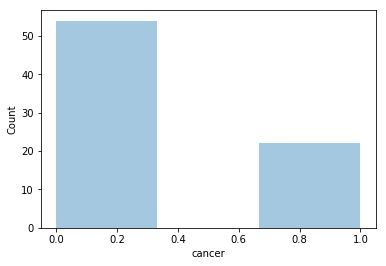

In [17]:
sb.distplot(data['cancer'],kde=False) # The outcome is labeled as 'class'
plt.ylabel("Count")

In [19]:
data.isnull().values.any()

True

In [20]:
data = data.iloc[:-4, :]

In [25]:
data.groupby('cancer')[['cancer']].count() 

,cancer
cancer,
0,54
1,18


In [21]:
data.isnull().values.any()

False

scale the data

In [22]:
y = data.iloc[:, 0].values
X = data.iloc[:, 1:].values

Run Random Forest Model and select top 50 important features

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_ # array of shape = [n_features]

In [28]:
feature_name = []
importance = []
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_),data.iloc[:, 1:].columns), reverse=True):
    print (v + ": " + str(k))
    feature_name.append(k)
    importance.append(v)

Feature importance ranking by Random Forest Model:
M27891_at: 0.058
M14636_at: 0.0549
M22960_at: 0.0537
M55150_at: 0.0534
Z80781_at: 0.0525
U38896_at: 0.0503
M21119_s_at: 0.0418
J03589_at: 0.0398
L20321_at: 0.0394
U67963_at: 0.0378
M80899_at: 0.0375
D87448_at: 0.0327
U50523_at: 0.0284
L08246_at: 0.0284
Z19002_at: 0.0266
U11821_s_at: 0.0247
L27584_s_at: 0.0227
L13203_at: 0.0224
M74524_at: 0.0217
D63487_at: 0.019
J03909_at: 0.0176
X60673_rna1_at: 0.0175
L43366_at: 0.0164
X12876_s_at: 0.0163
M29927_at: 0.0163
Z48501_s_at: 0.0138
M65292_s_at: 0.0126
M85289_at: 0.0124
HG2850-HT4814_s_at: 0.0122
U24266_at: 0.0119
L38517_at: 0.0111
D10495_at: 0.0105
U25789_at: 0.0094
M76378_at: 0.0092
U07856_at: 0.0077
D87023_cds2_at: 0.0072
U60808_s_at: 0.0071
X58528_s_at: 0.007
Z30644_at: 0.0068
U94832_at: 0.0067
L23333_s_at: 0.0066
D14811_at: 0.0064
U01102_at: 0.0062
X98225_at: 0.0055
hum_alu_at: 0.0
Z97074_at: 0.0
Z97054_xpt2_at: 0.0
Z96810_at: 0.0
Z95624_at: 0.0
Z94753_s_at: 0.0
Z93784_at: 0.0
Z86000_at:

In [29]:
importance.index('X98225_at')

43

In [30]:
important_feature = importance[:44]

In [31]:
important_feature[-1]

'X98225_at'

In [32]:
data_reduced = data[important_feature]

In [33]:
data_reduced.head()

,M27891_at,M14636_at,M22960_at,M55150_at,Z80781_at,U38896_at,M21119_s_at,J03589_at,L20321_at,U67963_at,M80899_at,D87448_at,U50523_at,L08246_at,Z19002_at,U11821_s_at,L27584_s_at,L13203_at,M74524_at,D63487_at,J03909_at,X60673_rna1_at,L43366_at,X12876_s_at,M29927_at,Z48501_s_at,M65292_s_at,M85289_at,HG2850-HT4814_s_at,U24266_at,L38517_at,D10495_at,U25789_at,M76378_at,U07856_at,D87023_cds2_at,U60808_s_at,X58528_s_at,Z30644_at,U94832_at,L23333_s_at,D14811_at,U01102_at,X98225_at
0,303.0,-44.0,330.0,654.0,65.0,75.0,-9.0,195.0,42.0,555.0,609.0,90.0,2567.0,543.0,-658.0,23.0,-944.0,1055.0,857.0,212.0,381.0,146.0,235.0,-205.0,-21.0,8418.0,56.0,-112.0,38.0,119.0,-268.0,-208.0,6556.0,114.0,-18.0,562.0,-10.0,164.0,1127.0,456.0,776.0,109.0,-201.0,-174.0
1,1358.0,52.0,811.0,1283.0,59.0,62.0,253.0,74.0,37.0,1063.0,329.0,138.0,3975.0,2972.0,-228.0,20.0,-728.0,932.0,330.0,724.0,2320.0,130.0,135.0,8.0,238.0,11569.0,31.0,-483.0,100.0,119.0,25.0,334.0,10632.0,675.0,-37.0,634.0,-43.0,162.0,1378.0,459.0,837.0,574.0,-130.0,-110.0
2,254.0,-116.0,212.0,1286.0,102.0,21.0,82.0,150.0,29.0,921.0,599.0,158.0,3093.0,485.0,-912.0,2.0,-923.0,1597.0,439.0,425.0,214.0,293.0,364.0,-200.0,333.0,9738.0,12.0,-463.0,-159.0,192.0,-134.0,-386.0,7688.0,861.0,45.0,483.0,-131.0,250.0,1324.0,442.0,645.0,314.0,-256.0,-228.0
3,-304.0,70.0,584.0,915.0,24.0,50.0,285.0,123.0,70.0,348.0,1014.0,205.0,2902.0,740.0,-719.0,-5.0,-982.0,256.0,94.0,851.0,429.0,99.0,388.0,-190.0,7.0,11464.0,-98.0,-212.0,5.0,160.0,-8.0,366.0,7736.0,530.0,-50.0,342.0,-126.0,70.0,1340.0,319.0,322.0,209.0,-86.0,-241.0
4,-86.0,151.0,1018.0,732.0,26.0,49.0,3058.0,440.0,157.0,589.0,641.0,213.0,3550.0,2453.0,-182.0,-11.0,-682.0,239.0,517.0,697.0,1557.0,28.0,111.0,-87.0,378.0,9349.0,20.0,-135.0,-90.0,265.0,-187.0,408.0,9239.0,598.0,-51.0,617.0,-58.0,71.0,806.0,835.0,767.0,49.0,-46.0,47.0


In [34]:
data_reduced.shape


(72, 44)

calculate correlation

In [35]:
corr = data_reduced[important_feature].corr()


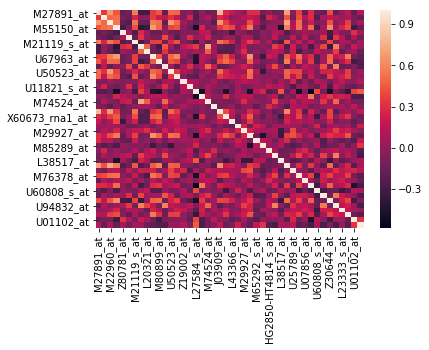

In [36]:
sb.heatmap(corr)

In [37]:
corr

,M27891_at,M14636_at,M22960_at,M55150_at,Z80781_at,U38896_at,M21119_s_at,J03589_at,L20321_at,U67963_at,M80899_at,D87448_at,U50523_at,L08246_at,Z19002_at,U11821_s_at,L27584_s_at,L13203_at,M74524_at,D63487_at,J03909_at,X60673_rna1_at,L43366_at,X12876_s_at,M29927_at,Z48501_s_at,M65292_s_at,M85289_at,HG2850-HT4814_s_at,U24266_at,L38517_at,D10495_at,U25789_at,M76378_at,U07856_at,D87023_cds2_at,U60808_s_at,X58528_s_at,Z30644_at,U94832_at,L23333_s_at,D14811_at,U01102_at,X98225_at
M27891_at,1.000000,0.342914,0.678626,0.442606,-0.175671,-0.110600,0.570268,-0.309367,-0.315491,0.346265,0.446477,-0.184018,0.500020,0.485338,-0.066663,-0.030892,-0.217187,-0.018065,-0.140514,-0.088789,0.805727,0.277374,0.192038,0.055593,-0.027897,0.294809,0.290498,-0.109232,-0.023433,-0.118511,-0.114636,0.685445,-0.049390,0.369987,-0.165484,0.286980,-0.127586,-0.162844,0.402448,-0.173644,-0.014726,0.153743,-0.184048,0.129163
M14636_at,0.342914,1.000000,0.499073,0.513506,-0.108816,-0.151915,0.268008,-0.012167,-0.010867,0.355553,0.210754,0.169329,0.318182,0.189886,-0.071316,0.247522,-0.238224,-0.034647,0.124092,-0.095461,0.288226,0.190379,-0.036576,0.044551,0.131265,0.194953,0.111473,-0.234655,0.258563,0.098926,-0.120725,0.430050,-0.129842,0.408304,0.119435,0.288661,-0.238735,0.070109,0.168979,0.120010,0.016817,0.101084,-0.085490,-0.162831
M22960_at,0.678626,0.499073,1.000000,0.547122,-0.183002,-0.252494,0.534727,-0.145054,-0.164091,0.565920,0.513002,-0.178464,0.673868,0.495858,0.040263,-0.087234,-0.162007,-0.088296,-0.038494,-0.204829,0.654165,0.355661,0.145542,0.048629,0.052981,0.402948,0.140197,-0.153906,-0.079815,-0.031429,0.001014,0.732013,0.104361,0.514195,-0.006885,0.219644,-0.063200,-0.046745,0.419623,-0.032259,0.080528,0.353810,-0.090114,0.080081
M55150_at,0.442606,0.513506,0.547122,1.000000,-0.291200,-0.116673,0.416379,-0.397696,-0.332265,0.682732,0.499414,-0.019966,0.378335,0.420848,-0.020636,-0.140033,-0.494723,0.255021,-0.088924,-0.030051,0.337389,0.452413,0.393748,0.047290,0.260600,0.559889,-0.026649,-0.257199,0.031372,0.027099,-0.461485,0.563204,0.138825,0.526068,0.104343,0.509054,-0.261359,0.060618,0.612723,0.024010,0.258437,0.412193,-0.310459,-0.150674
Z80781_at,-0.175671,-0.108816,-0.183002,-0.291200,1.000000,0.090386,-0.248056,0.276824,0.038793,-0.161273,-0.156854,0.007228,-0.133573,-0.158298,-0.063106,-0.069247,-0.055201,0.154254,0.184348,-0.182119,-0.129810,-0.105749,-0.343826,0.009007,-0.054526,-0.167956,-0.149962,0.004917,-0.053131,0.113772,0.058446,-0.241007,-0.103781,-0.020223,0.053855,-0.003331,-0.012935,0.043465,-0.293628,0.123084,-0.090095,-0.073331,0.319709,0.053320
U38896_at,-0.110600,-0.151915,-0.252494,-0.116673,0.090386,1.000000,-0.169904,0.324223,-0.017180,-0.091780,-0.100151,0.397107,0.029134,-0.224942,-0.043932,0.290509,0.017085,0.050365,0.226235,-0.076172,-0.095617,0.033596,0.037539,-0.142999,0.070145,0.101633,-0.180511,-0.035655,-0.059767,0.182865,-0.115279,-0.138352,0.168574,-0.109746,0.172276,-0.131394,-0.067719,0.313295,-0.323101,0.337215,0.127344,-0.175120,0.100156,-0.114735
M21119_s_at,0.570268,0.268008,0.534727,0.416379,-0.248056,-0.169904,1.000000,-0.282864,-0.112508,0.358268,0.370920,-0.134602,0.272551,0.426017,-0.061795,-0.149156,-0.311222,0.053216,-0.161531,-0.008756,0.526036,0.424041,0.235896,-0.123294,0.174993,0.369880,0.204044,-0.060941,0.126048,-0.175460,-0.287384,0.444132,-0.013761,0.197231,-0.094532,0.176987,-0.088814,-0.142815,0.378531,-0.113510,0.107005,0.084420,-0.103701,0.054631
J03589_at,-0.309367,-0.012167,-0.145054,-0.397696,0.276824,0.324223,-0.282864,1.000000,0.487328,-0.111400,-0.297623,0.452592,0.062926,-0.194249,0.177064,0.254769,0.357029,-0.091280,0.724028,0.060779,-0.170751,-0.229698,-0.227781,-0.054196,0.195529,-0.102354,-0.080564,-0.022682,-0.084917,0.356801,0.232737,-0.261427,0.218748,-0.128224,0.047871,-0.291465,0.071424,0.386372,-0.355866,0.573725,0.030133,-0.124508,0.196889,0.029565
L20321_at,-0.315491,-0.010867,-0.164091,-0.332265,0.038793,-0.017180,-0.112508,0.487328,1.000000,-0.130697

model training and result evaulation

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

In [109]:
print ("Logistic Regression (L2 is default) accuracy: " ,np.mean(cross_val_score(LogisticRegression(), X, y,cv=5)))
print ("Random forest accuracy: ",np.mean(cross_val_score(RandomForestClassifier(), X, y,cv=5)))
print ("K-nearest-neighbors accuracy: ", np.mean(cross_val_score(KNeighborsClassifier(), X, y,cv=5)))

Logistic Regression (L2 is default) accuracy:  0.7273992673992674
Random forest accuracy:  0.7315018315018315
K-nearest-neighbors accuracy:  0.7970695970695971


In [110]:
print("Logistic Regression auc score:",np.mean(cross_val_score(LogisticRegression(), X, y, scoring = 'roc_auc',cv=5)))
print("Random forest auc score:",np.mean(cross_val_score(RandomForestClassifier(), X, y, scoring = 'roc_auc',cv=5)))
print("K-nearest-neighbors auc score:",np.mean(cross_val_score(KNeighborsClassifier(), X, y, scoring = 'roc_auc',cv=5)))

Logistic Regression auc score: 0.7287878787878788
Random forest auc score: 0.791060606060606
K-nearest-neighbors auc score: 0.8401515151515152


Parameter sweeping and auc score

Find best paramters for LogisticRegression

In [48]:
penalty = ['l1', 'l2']
C = [1, 5, 10]

In [51]:
lg_res = []
for p in penalty:
    for c in C:
        score = np.mean(cross_val_score(LogisticRegression((C=c,penalty=p)), X, y, cv=5))
        lg_res.append([score, p, c])

In [58]:
# Find result with highest accuracy
def find_best(lst):
    return max(lst, key=lambda x: x[0])

In [60]:
print ('After parameter sweeping, we find:')
print ('Highest accuracy is:', find_best(lg_res)[0], 'with penalty ', find_best(lg_res)[1], 'and C ', find_best(lg_res)[2])

After parameter sweeping, we find:
Highest accuracy is: 0.7856410256410257 with penalty  l1 and C  5


Find best paramters for knn

In [55]:
n_neighbors=[3,4, 5,6,7,8, 9,10] 
 

In [100]:
knn_res = []
for n in n_neighbors:
    
    score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=n), X, y, cv=5))
    knn_res.append([score,n])

In [101]:
print ('After parameter sweeping, we find:')
print ('Highest accuracy is:', find_best(knn_res)[0], 'with n_neighbors ', find_best(knn_res)[1])

After parameter sweeping, we find:
Highest accuracy is: 0.7991208791208791 with n_neighbors  7


Find best parameters for Random Forest

In [92]:
min_samples_leaf=[1, 4, 7, 11, 14, 17] 
n_estimators=[1, 6, 11, 16, 21,26, 31, 36, 41, 46] 

In [93]:
rf_res = []
for ms in min_samples_leaf:
    for ne in n_estimators:
        score = np.mean(cross_val_score(RandomForestClassifier(n_estimators = ne,min_samples_leaf = ms), X, y, cv=5))
        rf_res.append([score,ms,ne])

In [94]:
print ('After parameter sweeping, we find:')
print ('Highest accuracy is:', find_best(rf_res)[0], 'min_samples_leaf ', find_best(rf_res)[1], 'and n_estimators', find_best(rf_res)[2])

After parameter sweeping, we find:
Highest accuracy is: 0.7735531135531135 min_samples_leaf  7 and n_estimators 26


ROC

Random forest

In [79]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from itertools import cycle

In [98]:
cv = StratifiedKFold(n_splits=5)
classifier = RandomForestClassifier(n_estimators = 26,min_samples_leaf = 7)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 1000)

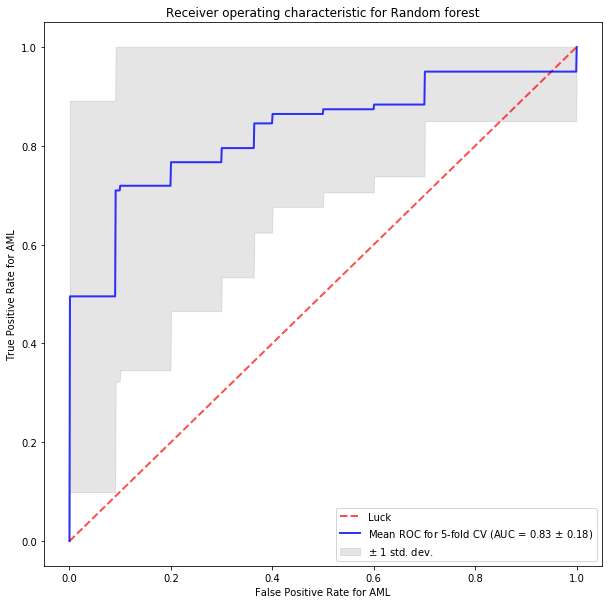

In [116]:
i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))# One-dimensional linear interpolation.Returns the one-dimensional piecewise linear interpolant to a function with given discrete data points (xp, fp), evaluated at x.
    tprs[-1][0] = 0.0 # set true positive value to be 0.0 when false positive value is 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.7)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC for 5-fold CV (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

#The default figure size (in inches) is controlled by
#matplotlib.rcParams['figure.figsize'] = [width, height]

plt.rcParams['figure.figsize'] = [10, 10]
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate for AML')
plt.ylabel('True Positive Rate for AML')
plt.title('Receiver operating characteristic for Random forest')
plt.legend(loc="lower right")
plt.show()



In [95]:
print("Random Forest auc score:",np.mean(cross_val_score(RandomForestClassifier(n_estimators = 26,min_samples_leaf = 7), X, y, scoring = 'roc_auc',cv=5)))

Random Forest auc score: 0.8303030303030303


knn

In [102]:
classifier = KNeighborsClassifier(n_neighbors=n)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 1000)

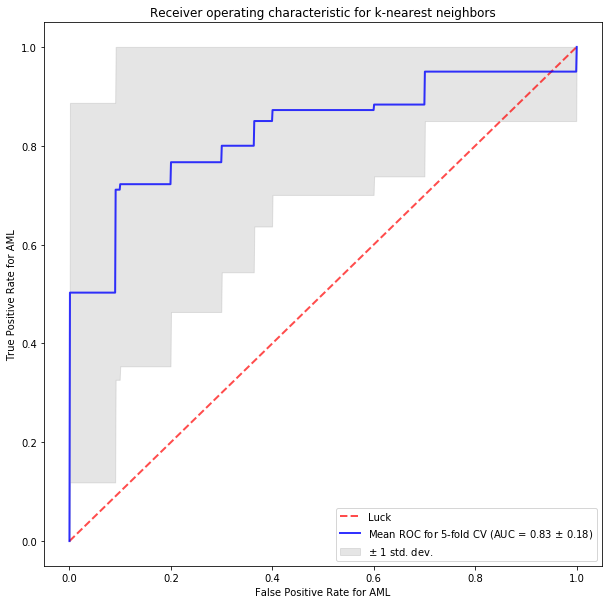

In [115]:
i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))# One-dimensional linear interpolation.Returns the one-dimensional piecewise linear interpolant to a function with given discrete data points (xp, fp), evaluated at x.
    tprs[-1][0] = 0.0 # set true positive value to be 0.0 when false positive value is 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.7)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC for 5-fold CV (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

#The default figure size (in inches) is controlled by
#matplotlib.rcParams['figure.figsize'] = [width, height]

plt.rcParams['figure.figsize'] = [10, 10]
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate for AML')
plt.ylabel('True Positive Rate for AML')
plt.title('Receiver operating characteristic for k-nearest neighbors')
plt.legend(loc="lower right")
plt.show()




In [74]:
print("KNN auc score:",np.mean(cross_val_score(KNeighborsClassifier(n_neighbors = 7), X, y, scoring = 'roc_auc',cv=5)))

KNN auc score: 0.8559090909090908


logistic regression

In [104]:
classifier = LogisticRegression(C=5,penalty= 'l1')
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 1000)

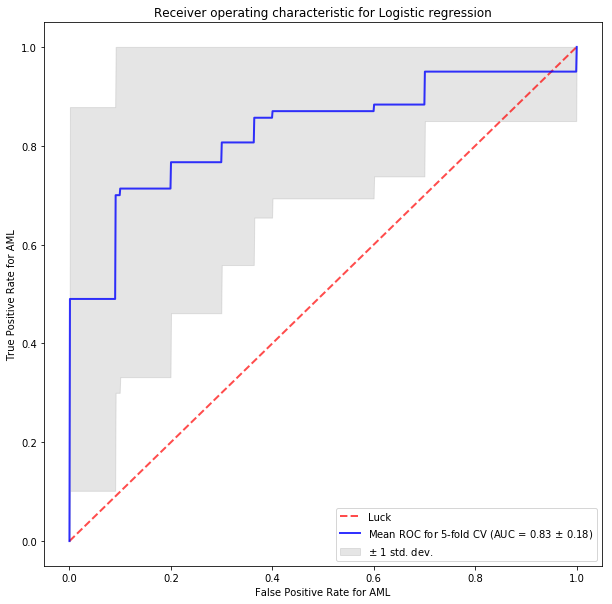

In [114]:
i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))# One-dimensional linear interpolation.Returns the one-dimensional piecewise linear interpolant to a function with given discrete data points (xp, fp), evaluated at x.
    tprs[-1][0] = 0.0 # set true positive value to be 0.0 when false positive value is 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.7)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC for 5-fold CV (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

#The default figure size (in inches) is controlled by
#matplotlib.rcParams['figure.figsize'] = [width, height]

plt.rcParams['figure.figsize'] = [10, 10]
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate for AML')
plt.ylabel('True Positive Rate for AML')
plt.title('Receiver operating characteristic for Logistic regression')
plt.legend(loc="lower right")
plt.show()



In [61]:
print("Logistic Regression auc score:",np.mean(cross_val_score(LogisticRegression(C=5,penalty= 'l1'), X, y, scoring = 'roc_auc',cv=5)))

Logistic Regression auc score: 0.8145454545454545
